In [276]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm
from scipy import stats
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [125]:
df = pd.read_csv('train.csv')

In [126]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [127]:
df.shape

(381109, 12)

In [128]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Initial Data Exploration/Pre-processing

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Feature Engineering: 



In [130]:
#Drop columns that aren't useful: 


df = df.drop(["id"], axis=1, errors="ignore") #To prevent errors in multiple run of cell, 
                                              #errors on drop is ignored

In [131]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [132]:
#Looks like this column has 53 unique region codes, could be useful information 
#related to annual premium costs

#df['Region_Code'].nunique()
df['Region_Code'].unique()
#df[''].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [10]:
#According to the description of this dataset, policy sales channel refers to how the customer was 
#contacted when they gave their response. I will not be dropping this because
#it may contain valueable information 


#df['Policy_Sales_Channel'].nunique()
#df['Policy_Sales_Channel'].value_counts()
#df['Vehicle_Age'].value_counts()
#df['Region_Code'].value_counts()

In [133]:
#Vehicle age is currently represented as an object, in order to convert it into a continuous value
#we can convert the argument into a number that satisfies it, then convert that "number" into a float type
#I'm choosing to do it this way in order to do feature engineering later, otherwise another option 
#would've been one hot encoding


df['Vehicle_Age'].replace(to_replace =['> 2 Years'], value = '2', inplace=True)
df['Vehicle_Age'].replace(to_replace =['1-2 Year'], value = '1', inplace=True)
df['Vehicle_Age'].replace(to_replace =['< 1 Year'], value = '0', inplace=True)
#df['Vehicle_Age'].unique()
df['Vehicle_Age'] = df['Vehicle_Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 32.0+ MB


In [134]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0


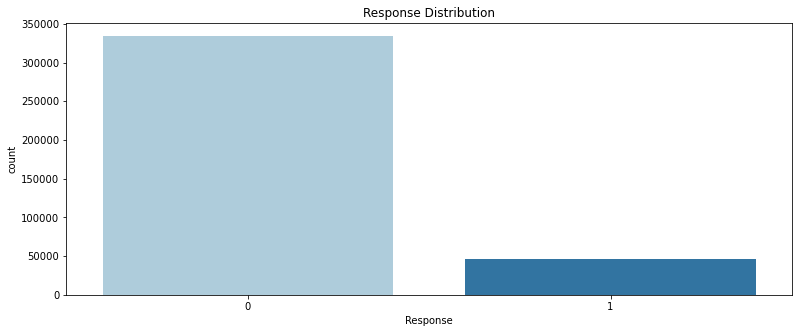

In [295]:
#Look at target distribution: 

plt.figure(figsize = (13, 5))
sns.countplot(df['Response'], palette = 'Paired')
plt.title("Response Distribution")
plt.show()

In [14]:
#Very inbalanced dataset, will need to fix this later (oversampling of minority class)

### Visualizing Variables, and Relationship with Target 

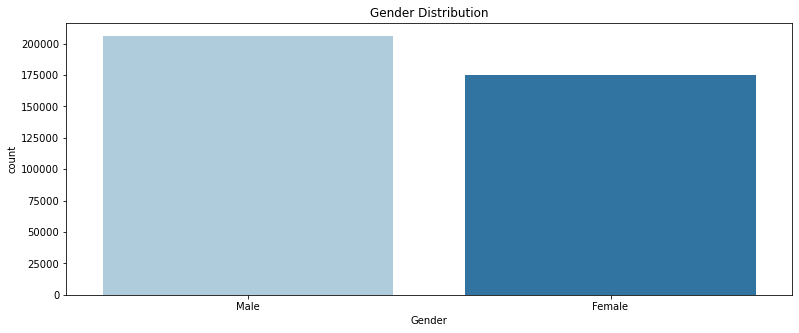

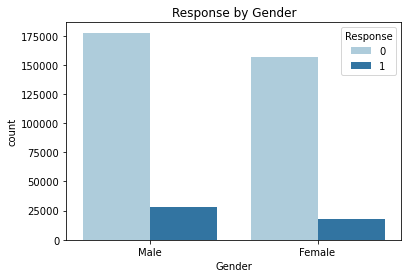

In [138]:
#Gender Distribution: 

plt.figure(figsize = (13, 5))
sns.countplot(df['Gender'], palette = 'Paired')
plt.title("Gender Distribution")
plt.show()


plt.subplot(1,1,1)
sns.countplot(df['Gender'], hue = df['Response'],palette="Paired")
plt.title("Response by Gender")
plt.show()

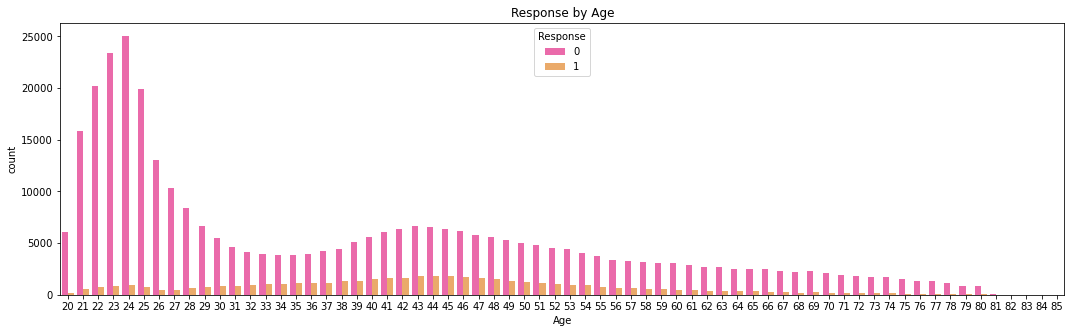

In [145]:
#Age Distribution and Response 

plt.figure(figsize = (18, 5))
sns.countplot(df['Age'], hue= df['Response'], palette = 'spring')
plt.title("Response by Age")
plt.show()

In [19]:
#Most of our yes responses are coming from people between 35-50

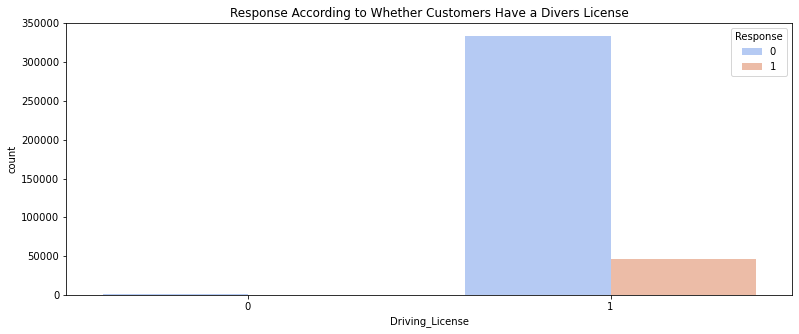

In [149]:
#Drivers License Distribution

plt.figure(figsize = (13, 5))
sns.countplot(df['Driving_License'], hue= df['Response'], palette = 'coolwarm')
plt.title("Response According to Whether Customers Have a Divers License")
plt.show()


#Here we can see that we have more people interested in buying vehicle insurance 
#when they have a drivers license, compared to those that do not have a drivers license, which makes sense

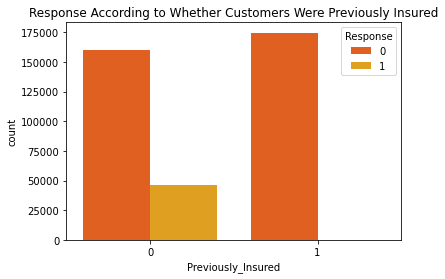

In [148]:
#Previously Insured Distribution 

sns.countplot(x='Previously_Insured',hue='Response',data=df,palette='autumn')
plt.title("Response According to Whether Customers Were Previously Insured")
plt.show()



In [ ]:
#Here we see that our interested customers primarily haven't been previously insured, 
#so they may be in need of buying vehicle insurance

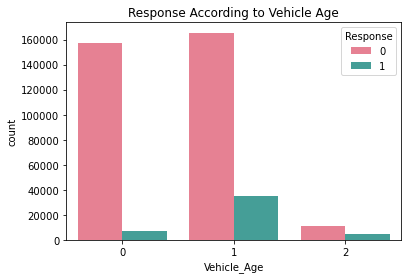

In [155]:
#Vehicle Age Distribution

sns.countplot(x='Vehicle_Age',hue='Response',data=df,palette='husl')
plt.title("Response According to Vehicle Age")
plt.show()


In [ ]:
#We see here that most interested parties have had their vehicle for between 1-2 years.
#In contrast, people who owned a vehicle for less than a year 
#are very unlikely to be interested in buying insurance

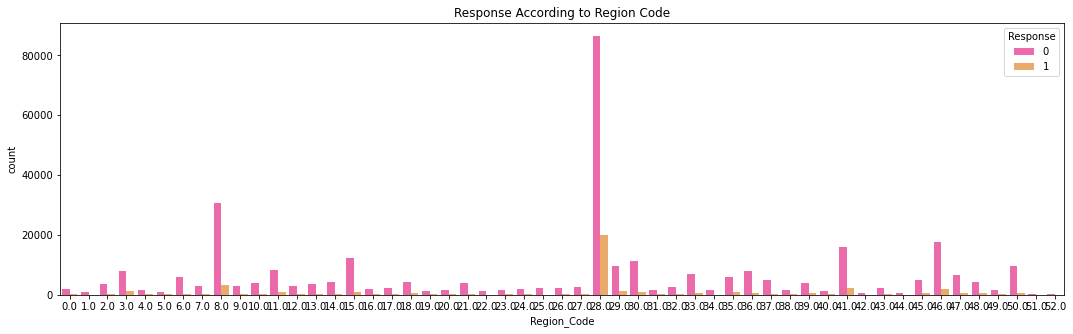

In [156]:
#Distribution of Region Code 

plt.figure(figsize = (18, 5))
sns.countplot(df['Region_Code'], hue= df['Response'], palette = 'spring')
plt.title("Response According to Region Code")
plt.show()



#Here we see that certain region codes have more customers who are interested in buying vehicle insurance
#Namely, region code 28 and 8 & 46 (although to a lesser degree)

In [23]:
df.groupby(['Region_Code']).Response.value_counts().sort_values(ascending =False)

Region_Code  Response
28.0         0           86498
8.0          0           30620
28.0         1           19917
46.0         0           17717
41.0         0           16039
                         ...  
22.0         1              83
42.0         1              44
44.0         1              33
52.0         1              33
51.0         1              28
Name: Response, Length: 106, dtype: int64

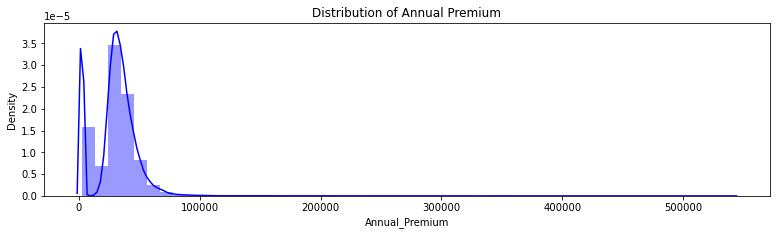

In [157]:
#Distribution of Annual Premium 

plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='blue')
plt.title("Distribution of Annual Premium")
plt.show()


#Here we see a bimodal distribution of the Annual Premium, which is also right tailed, 
#indicating a few outliers at the higher premium levels

In [24]:
df['Annual_Premium'].describe()


count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

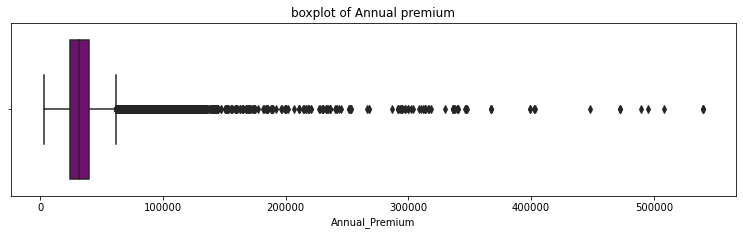

In [167]:
#Boxplot of Annual Premium to visualize outliers

plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'], color='purple')
plt.title("boxplot of Annual premium")
plt.show()

Text(0.5, 1.05, 'Correlation of Features')

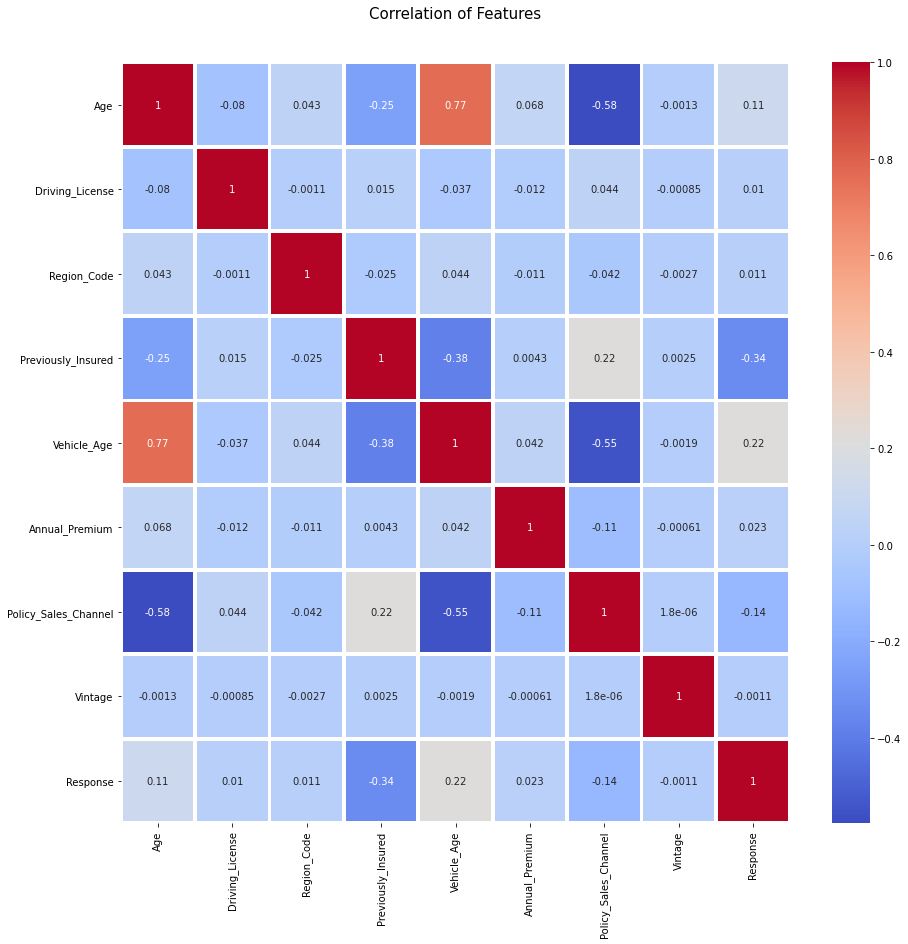

In [158]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15,14))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='coolwarm')

plt.title("Correlation of Features", y=1.05, size=15)

### Feature Encoding and Feature Selection: 

In [173]:
#Change Gender into numerical values: Male = 1, Female = 0 

df['Gender'] = df['Gender'].apply(lambda x: 1 if x== "Male" else 0)
df['Gender'] = df['Gender'].astype(int)

df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 1 if x== "Yes" else 0)
df['Vehicle_Damage'] = df['Vehicle_Damage'].astype(int)

[0.         0.13614602 0.00043319 0.09939986 0.05761259 0.01765441
 0.07385622 0.26077928 0.06707867 0.28703976]


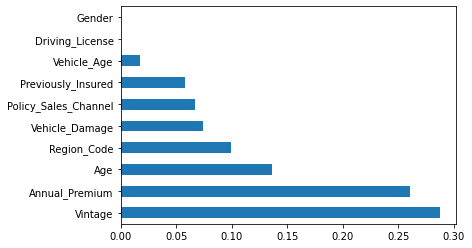

In [175]:
from sklearn.ensemble import ExtraTreesClassifier

x=df.drop(['Response'],axis=1) 
y=df['Response']   

etc = ExtraTreesClassifier()
etc.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

## Baseline Model: 

In [28]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [29]:
#change categoricl to numerical in order to fit model:

changelabel= LabelEncoder()
df['Gender'] = changelabel.fit_transform(df['Gender'])
df['Vehicle_Age'] = changelabel.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = changelabel.fit_transform(df['Vehicle_Damage'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 32.0 MB


In [31]:
#features: 
X=df.drop(['Response'],axis=1)

#target:
y=df['Response']        

In [296]:

#dividing the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

(304887, 10) (76222, 10) (304887,) (76222,)


In [297]:
model=LogisticRegression()
model=model.fit(x_train,y_train)
pred=model.predict(x_test)
lr_probability =model.predict_proba(x_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)


In [299]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

f2_lr_base = fbeta_score(y_test, pred,  beta=2)

print(f2_lr_base)

0.0


[[66845     1]
 [ 9376     0]]


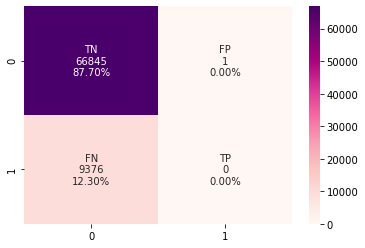

In [298]:
cm=confusion_matrix(y_test, pred)
group_names = ['TN','FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
print(cm)
plt.savefig('cm_classifiction.png')

In [177]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     31221
           1       0.00      0.00      0.00         0

    accuracy                           0.88     31221
   macro avg       0.50      0.44      0.47     31221
weighted avg       1.00      0.88      0.94     31221



# Testing Model Options: 

## Logistic Regression

### Balancing dataset

In [237]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

# Adjusting for imbalanced dataset: 'balanced' class weight, and custom class weight of 5 for minority class
lr = LogisticRegression(solver='liblinear') 
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_5x = LogisticRegression(class_weight={1 : 5, 0 : 1}, solver='liblinear')



#Fitting Logistic regression model onto balanced dataset, calculating F2, printing score:
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print('Logistic Regression Test F2:')
f2_lr=fbeta_score(y_test, y_pred, beta=2)
print(f2_lr)
print('\n')
print('Logistic Regression Test F3:')
print(fbeta_score(y_test, y_pred, beta=3))
print('\n')

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')
lr_balanced.fit(x_train, y_train)
y_pred= lr_balanced.predict(x_test)
print('Balanced class weights Logistic Regression Test F2')
f2_lr_bal = fbeta_score(y_test, y_pred,  beta=2)
print(f2_lr_bal)
print('\n')
print('Balanced class weights Logistic Regression Test F3')
print(fbeta_score(y_test, y_pred, beta=3))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')
lr_5x.fit(x_train, y_train)
y_pred= lr_5x.predict(x_test)
print('5:1 class weights Logistic Regression Test F2')
f2_lr_5x = fbeta_score(y_test, y_pred, beta=2)
print(f2_lr_5x)
print('\n')
print('5:1 class weights Logistic Regression Test F3')
print(fbeta_score(y_test, y_pred, beta=3))

print('\n')
print('\n')

#Printing confusuon matrix and classification report  
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('\n')

print('Classification Report: Logistic Regression')
print (classification_report (y_test, y_pred))



Logistic Regression Test F2:
0.0


Logistic Regression Test F3:
0.0


Confusion Matrix
[[21919     1]
 [ 3056     0]]




Balanced class weights Logistic Regression Test F2
0.6171613063454613


Balanced class weights Logistic Regression Test F3
0.7561043637009053


Confusion Matrix
[[12967  8953]
 [   74  2982]]




5:1 class weights Logistic Regression Test F2
0.6151663119235423


5:1 class weights Logistic Regression Test F3
0.7512550648556356




Confusion Matrix
[[13131  8789]
 [  108  2948]]


Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     21920
           1       0.25      0.96      0.40      3056

    accuracy                           0.64     24976
   macro avg       0.62      0.78      0.57     24976
weighted avg       0.90      0.64      0.70     24976



#### We see some improvement in F2 and F3 score, let's try other models to see increase our recall score further:

## Decision Tree

In [228]:
from sklearn.tree import DecisionTreeClassifier


x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.2, random_state= 42)

dtc = DecisionTreeClassifier()
dtc_balanced = DecisionTreeClassifier(class_weight='balanced')
dtc_5x = DecisionTreeClassifier(class_weight={1 : 5, 0 : 1})

dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print('Decision Tree F2:')  #unbalanced dataset
f2_dt = fbeta_score(y_test, y_pred, beta=2)
print(f2_dt)
print('\n')
print('Decision Tree F3:')
print(fbeta_score(y_test, y_pred, beta=3))
print('\n')

print('Confusion Matrix for Decision Tree Classifier')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')


dtc_balanced.fit(x_train, y_train)
y_pred= dtc_balanced.predict(x_test)
print('Balanced class weights For Decision Tree: F2')
f2_dt_bal= fbeta_score(y_test, y_pred, beta=2)
print(f2_dt_bal)
print('\n')
print('Balanced class weights For Decision Tree F3')
print(fbeta_score(y_test, y_pred, beta=3))
print('\n')
print('Confusion Matrix for Decision Tree Classifier, Balanced')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')
dtc_5x.fit(x_train, y_train)
y_pred= dtc_5x.predict(x_test)
print('5:1 class weights Decision Tree: F2')
f2_dt_5x= fbeta_score(y_test, y_pred, beta=2)
print(f2_dt_5x)
print('\n')
print('5:1 class weights Decision Tree: F3')
print(fbeta_score(y_test, y_pred, beta=3))

print('\n')
print('\n')

#Printing confusuon matrix and classification report  
print('Confusion Matrix for Decision Tree Classifier')
print(confusion_matrix(y_test, y_pred))

print('\n')

print('Classification Report: Decision Tree')
print (classification_report (y_test, y_pred))


Decision Tree F2:
0.2991342550717147


Decision Tree F3:
0.30105988685870344


Confusion Matrix for Decision Tree Classifier
[[19592  2328]
 [ 2130   926]]




Balanced class weights For Decision Tree: F2
0.2744363373430619


Balanced class weights For Decision Tree F3
0.2738333387990686


Confusion Matrix for Decision Tree Classifier, Balanced
[[19766  2154]
 [ 2221   835]]




5:1 class weights Decision Tree: F2
0.29228651943115536


5:1 class weights Decision Tree: F3
0.2920855299780608




Confusion Matrix for Decision Tree Classifier
[[19777  2143]
 [ 2164   892]]


Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     21920
           1       0.29      0.29      0.29      3056

    accuracy                           0.83     24976
   macro avg       0.60      0.60      0.60     24976
weighted avg       0.83      0.83      0.83     24976



## RandomForest

In [230]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest_balanced = RandomForestClassifier(class_weight='balanced')
randomforest_5x = RandomForestClassifier(class_weight={1 : 5, 0 : 1})

randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
RF_probability = randomforest.predict_proba(x_test)[:,1]



print('Random forest F2:')  #unbalanced dataset
f2_rf= fbeta_score(y_test, y_pred, beta=2)
print(f2_rf)
print('\n')
print('Random Forest F3:')
print(fbeta_score(y_test, y_pred, beta=3))
print('\n')

print('Confusion Matrix for Random Forest Classifier')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')


randomforest_balanced.fit(x_train, y_train)
y_pred= randomforest_balanced.predict(x_test)
RF_bal_probability = randomforest_balanced.predict_proba(x_test)[:,1]


print('Balanced class weights For Random Forest: F2')
f2_rf_bal= fbeta_score(y_test, y_pred, beta=2)
print(f2_rf_bal)
print('\n')
print('Balanced class weights For Random Forest: F3')
print(fbeta_score(y_test, y_pred, beta=3))
print('\n')
print('Confusion Matrix for Random Forest Classifier, Balanced')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')
randomforest_5x.fit(x_train, y_train)
y_pred= randomforest_5x.predict(x_test)
RF_5x_probability = randomforest_5x.predict_proba(x_test)[:,1]

print('5:1 class weights Random Forest: F2')
f2_rf_5x= fbeta_score(y_test, y_pred,  beta=2)
print(f2_rf_5x)
print('\n')
print('5:1 class weights Random Forest: F3')
print(fbeta_score(y_test, y_pred, beta=3))

print('\n')
print('\n')

#Printing confusuon matrix and classification report  
print('Confusion Matrix for Random Forest')
print(confusion_matrix(y_test, y_pred))

print('\n')

print('Classification Report: Random Forest')
print (classification_report (y_test, y_pred))



Random forest F2:
0.11954778091818806


Random Forest F3:
0.11032392231504


Confusion Matrix for Random Forest Classifier
[[21366   554]
 [ 2743   313]]




Balanced class weights For Random Forest: F2
0.10714561011331226


Balanced class weights For Random Forest: F3
0.09839663044632428


Confusion Matrix for Random Forest Classifier, Balanced
[[21449   471]
 [ 2778   278]]




5:1 class weights Random Forest: F2
0.10621921182266009


5:1 class weights Random Forest: F3
0.09762308998302206




Confusion Matrix for Random Forest
[[21428   492]
 [ 2780   276]]


Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     21920
           1       0.36      0.09      0.14      3056

    accuracy                           0.87     24976
   macro avg       0.62      0.53      0.54     24976
weighted avg       0.82      0.87      0.83     24976



## XGBoost

In [231]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb_balanced = XGBClassifier(class_weight='balanced')
xgb_3x = XGBClassifier(scale_pos_weight =3)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
XGB_probability = xgb.predict_proba(x_test)[:,1]

print('XGBoost F2:')  #unbalanced dataset
f2_xgb= fbeta_score(y_test, y_pred, beta=2)
print(f2_xgb)
print('\n')
print('XGBoost F3:')
print(fbeta_score(y_test, y_pred, beta=3))
print('\n')

print('Confusion Matrix for XGBoost Classifier')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')


xgb_balanced.fit(x_train, y_train)
y_pred= xgb_balanced.predict(x_test)
XGB_probability = xgb_balanced.predict_proba(x_test)[:,1]


print('Balanced class weights For XGBoost: F2')
f2_xgb_bal= fbeta_score(y_test, y_pred, beta=2)
print(f2_xgb_bal)
print('\n')
print('Balanced class weights For XGBoost: F3')
print(fbeta_score(y_test, y_pred, beta=3))
print('\n')
print('Confusion Matrix for XGBoost Classifier, Balanced')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')

xgb_3x.fit(x_train, y_train)
y_pred= xgb_3x.predict(x_test)

print('3x class weights XGBoost: F2')
f2_xgb_3x= fbeta_score(y_test, y_pred, beta=2)
print(f2_xgb_3x)
print('\n')
print('3x class weights XGBoost: F3')
print(fbeta_score(y_test, y_pred, beta=3))

print('\n')
print('\n')

#Printing confusuon matrix and classification report  
print('Confusion Matrix for XGBoost')
print(confusion_matrix(y_test, y_pred))

print('\n')

print('Classification Report: XGBoost')
print (classification_report (y_test, y_pred))




[16:02:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost F2:
0.05375915896782414


XGBoost F3:
0.04849834746371605


Confusion Matrix for XGBoost Classifier
[[21723   197]
 [ 2921   135]]




[16:02:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:02:04] WARNING: /opt/concourse/worker/volumes/live/

## What is Our Best Model?

In [238]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest', 'XGBoost', 
               ],
    'Score': [f2_lr_bal, f2_dt_5x, f2_rf_bal, 
              f2_xgb_3x]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.617161,Logistic Regression
0.549104,XGBoost
0.292287,Decision Tree
0.107146,Random Forest


#### According to our F2 scores, it seems logistic regression and xgboost are our best models. 
Lets hypertune parameters for these!

## Hyperparameter Tuning of Models: 

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


### Logisitic Regression 

In [247]:
logModel = LogisticRegression(class_weight='balanced')

In [248]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [250]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [251]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [252]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', penalty='none')

In [253]:
f2_lr_bal_gscv = fbeta_score(y_test, y_pred,  beta=2)

In [254]:
print(f2_lr_bal_gscv)

0.6151663119235423


In [ ]:
# Hyper parameter tuning gave our logistic regression model a slightly worse f2 score,
# we won't be using this version on our test set 

### XGBoost

In [266]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

n_estimators = [100]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

params_grid = {
    'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
    'booster' : booster, 'base_score' : base_score
                      }

xgb_clf = XGBClassifier(scale_pos_weight =3)

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=2, scoring = fbeta_score ,n_jobs =-1, verbose=1)


xgb_cv.fit(x_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(x_train, y_train)


Fitting 2 folds for each of 640 candidates, totalling 1280 fits
[19:38:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best paramters: {'base_score': 0.25, 'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}
[19:38:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [267]:
f2_xgb_3x_gscv = fbeta_score(y_test, y_pred,  beta=2)

print(f2_xgb_3x_gscv)

0.6151663119235423


In [ ]:
#Hyper parameter tuning improved the f2 score for xgboost quite a bit,
#but our best model is still logistic regression without hyper parameter tuning

In [268]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression with Tuning','XGBoost','XGBoost with Tuning'
               ],
    'Score': [f2_lr_bal, f2_lr_bal_gscv, f2_xgb_3x, f2_xgb_3x_gscv]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.617161,Logistic Regression
0.615166,Logistic Regression with Tuning
0.615166,XGBoost with Tuning
0.549104,XGBoost


In [277]:
y_pred = best_clf.predict(x_test)

In [278]:
f2_lr_test = fbeta_score(y_test, y_pred,  beta=2)
print(f2_lr_test)

0.6171613063454613


In [274]:
y_pred = xgb_clf.predict(x_test)

In [275]:
f2_xgb_test = fbeta_score(y_test, y_pred,  beta=2)

print(f2_xgb_test)

0.0


[[12967  8953]
 [   74  2982]]


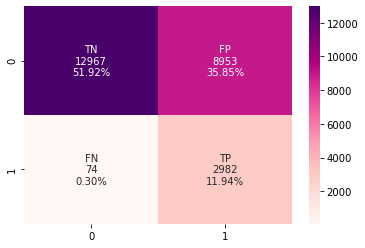

In [285]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_pred)
group_names = ['TN','FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
print(cm)
plt.savefig('cm_classifiction.png')

## Taking a Look at Our Coefficients

In [288]:
print(lr_balanced.coef_, lr_balanced.intercept_)

[[ 0.08201022 -0.08544715  0.09919447 -0.00856679 -1.94382507 -0.12318966
   1.117609    0.03052271 -0.18114809 -0.00749542]] [-2.08729172]


In [289]:
lr_balanced.coef_

array([[ 0.08201022, -0.08544715,  0.09919447, -0.00856679, -1.94382507,
        -0.12318966,  1.117609  ,  0.03052271, -0.18114809, -0.00749542]])

In [301]:
logreg = LogisticRegression()
logreg.fit(X, y)
log_odds = logreg.coef_[0]

pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
Vehicle_Damage,2.026383
Gender,0.117056
Annual_Premium,-0.000003
Vintage,-0.001251
Policy_Sales_Channel,-0.007695
Region_Code,-0.009494
Age,-0.028976
Driving_License,-0.229017
Vehicle_Age,-0.505362
Previously_Insured,-2.156361


In [ ]:
df.to_csv('insurance.csv', index=False)